<a href="https://colab.research.google.com/github/Mossai-r/LungCancer_Prediction-using-KNN/blob/main/KNN_LungCancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#preprocess
import pandas as pd
df=pd.read_csv("/content/lung_cancer_examples.csv")
df.isnull().sum()

X=df.iloc[:,2:6].values
X
y=df.iloc[:,-1].values
y

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [29]:
#minmax scale
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
#print(knn.predict([[4,7]]))
y_pred= knn.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1]
[1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1]


In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

94.44444444444444


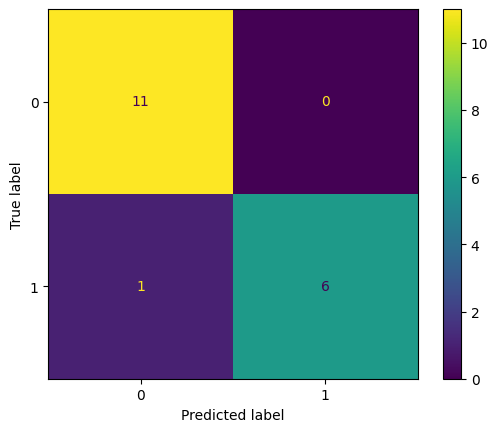

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
cm